## Домашняя работа. Pandas

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

#### Полезная литература

- http://pandas.pydata.org/pandas-docs/stable/10min.html
- https://pandas.pydata.org/pandas-docs/stable/indexing.html
- https://pandas.pydata.org/pandas-docs/stable/missing_data.html

В этом задании мы с вами рассмотрим датасет [Adult Data Set](https://archive.ics.uci.edu/ml/datasets/Adult).
Основывается он на данных переписи населения 1994 года в США.

Расшифровка содержимого колонок:

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous. sampling weight, more here: SIPP Weighting.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous. Income from investment sources, apart from wages/salary.
- capital-loss: continuous. Losses from investment sources, apart from wages/salary.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- income: Target feature. Binary.	Income >50K, <=50K.

In [1]:
import pandas as pd
import numpy as np
pd.__version__ # 1.4.1

'2.2.2'

In [4]:
columns='age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income'.split(',')
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', na_values='?', names=columns, skipinitialspace=True)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


1) Выведите последние 10 элеметнов датасета

In [3]:
last_rows = df.tail(10)
last_rows


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32551,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32552,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32553,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


2) Сколько колонок и сколько строк в этом датасете?

In [ ]:
print(len(df))
print(len(df.columns))

32561
15


3) Какие типы данных у элементов этого датасета?

In [ ]:
df.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education-num,int64
marital-status,object
occupation,object
relationship,object
race,object
sex,object


4) Какие признаки имеют пропуски?

In [ ]:
missing_values = df.isnull().sum()
missing_columns = missing_values[missing_values > 0]
print(missing_columns)


Series([], dtype: int64)


5) Как вы думаете, с чем связаны пропуски этих значение. Напишите развернутый ответ в ячейке ниже.

Ваш ответ: я думаю, что это неккоретный ввод или ошибки в процессе сбора данных


6) Какие и сколько различных рабочих классов workclass представлено в выборке?

In [ ]:
counts = df['workclass'].value_counts()
print(counts)


workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64


7) Какой средний возраст женщин и мужчин?

In [ ]:
average = df.groupby('sex')['age'].mean()
print(average)

sex
Female    36.858230
Male      39.433547
Name: age, dtype: float64


8) Постройте гистограмму(bar) распределения образования людей (education)

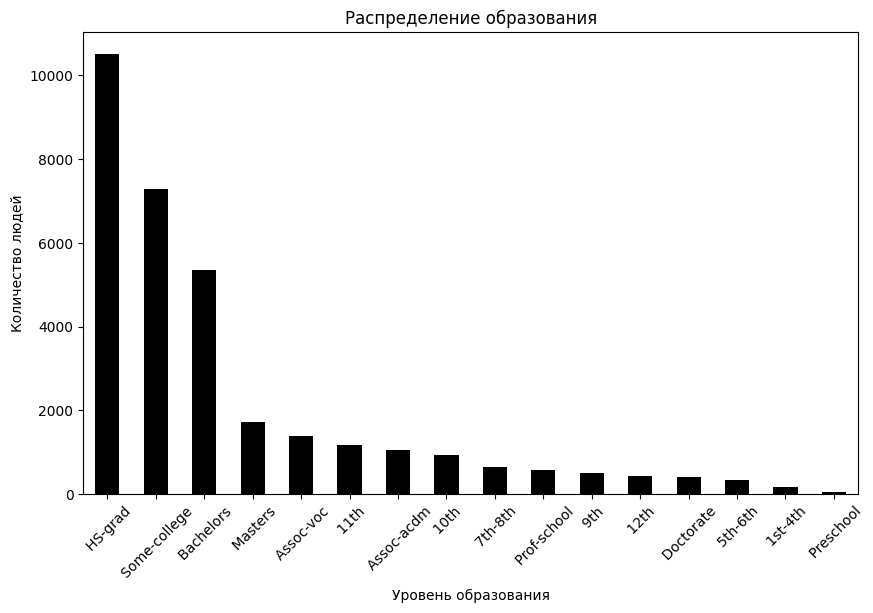

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df['education'].value_counts().plot(kind='bar', color='black')
plt.title('Распределение образования')
plt.xlabel('Уровень образования')
plt.ylabel('Количество людей')
plt.xticks(rotation=45)
plt.show()


9) Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак salary) и тех, кто получает менее 50K в год?

In [ ]:
average = df.groupby('income')['age'].agg(['mean', 'std'])
print(average)

             mean        std
income                      
<=50K   36.783738  14.020088
>50K    44.249841  10.519028


10) Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters или Doctorate)

In [ ]:
import pandas as pd

higher_education = ['Bachelors', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Masters', 'Doctorate']

high_income = df[df['income'] == '>50K']

all_have_higher_education = high_income['education'].isin(higher_education).all()

if all_have_higher_education:
    print("Да, все люди с доходом >50K имеют как минимум высшее образование.")
else:
    print("Нет, среди людей с доходом >50K есть те, кто не имеет высшего образования.")

Да, все люди с доходом >50K имеют как минимум высшее образование.


11) Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак marital-status)? Женатыми считаем тех, у кого marital-status начинается с Married (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.

In [ ]:
df['sex'] = df['sex'].str.strip()
df['marital-status'] = df['marital-status'].str.strip()
df['income'] = df['income'].str.strip()

men = df[df['sex'] == 'Male']

married_statuses = ['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse']
married_men = men[men['marital-status'].isin(married_statuses)]
single_men = men[~men['marital-status'].isin(married_statuses)]

if married_men.shape[0] > 0 and single_men.shape[0] > 0:
    married_men_high_income_ratio = married_men[married_men['income'] == '>50K'].shape[0] / married_men.shape[0]
    single_men_high_income_ratio = single_men[single_men['income'] == '>50K'].shape[0] / single_men.shape[0]

    print(f"Доля зарабатывающих >50K среди женатых мужчин: {married_men_high_income_ratio:.2%}")
    print(f"Доля зарабатывающих >50K среди холостых мужчин: {single_men_high_income_ratio:.2%}")

    if married_men_high_income_ratio > single_men_high_income_ratio:
        print("Среди женатых мужчин больше доля заравающих >50K.")
    else:
        print("Среди холостых мужчин больше доля зарабатывающих >50K.")
else:
    print("Одна из групп (женатые или холостые мужчины) пуста. Проверьте данные.")

Доля зарабатывающих >50K среди женатых мужчин: 44.05%
Доля зарабатывающих >50K среди холостых мужчин: 8.45%
Среди женатых мужчин больше доля заравающих >50K.


12) Посчитайте среднее время работы (hours-per-week) зарабатывающих мало и много (salary) для каждой страны (native-country).

In [ ]:
df['native-country'] = df['native-country'].str.strip()
df['income'] = df['income'].str.strip()

# Разделяем данные на группы по income
high_income = df[df['income'] == '>50K']
low_income = df[df['income'] == '<=50K']

# Группируем по стране и вычисляем среднее значение рабочих часов для каждой группы
high_income_avg_hours = high_income.groupby('native-country')['hours-per-week'].mean()
low_income_avg_hours = low_income.groupby('native-country')['hours-per-week'].mean()

# Выводим результаты
print("Среднее количество рабочих часов зарабатывающих >50K:")
print(high_income_avg_hours)
print("\nСреднее количество рабочих часов зарабатывающих <=50K:")
print(low_income_avg_hours)


Среднее количество рабочих часов зарабатывающих >50K:
native-country
?                     45.547945
Cambodia              40.000000
Canada                45.641026
China                 38.900000
Columbia              50.000000
Cuba                  42.440000
Dominican-Republic    47.000000
Ecuador               48.750000
El-Salvador           45.000000
England               44.533333
France                50.750000
Germany               44.977273
Greece                50.625000
Guatemala             36.666667
Haiti                 42.750000
Honduras              60.000000
Hong                  45.000000
Hungary               50.000000
India                 46.475000
Iran                  47.500000
Ireland               48.000000
Italy                 45.400000
Jamaica               41.100000
Japan                 47.958333
Laos                  40.000000
Mexico                46.575758
Nicaragua             37.500000
Peru                  40.000000
Philippines           43.032787
Pol

13) Постройте сводную таблицу для сравнения уровня образования и разницы между capital.gain и capital.loss (то есть пассивный доход). Сделайте так, чтобы capital.gain - capital.loss создали не больше 10 разных уникальных значений. То есть, gain и loss - это числа в каком-то диапазоне. Это количественные признаки из вещественных чисел. С помощью математических функций, типа log, извлечение корня N-ой степени и округления можно перейти к категориальным признакам.

In [ ]:
import numpy as np
df.columns = df.columns.str.strip()


# расчет разницы между capital-gain и capital-loss
df['capital_gain_loss'] = df['capital-gain'] - df['capital-loss']

# преобразование разницы в категории (логарифмирование и разбивка на 10 групп)
df['capital_gain_loss_category'] = np.log1p(df['capital_gain_loss'].abs())
df['capital_gain_loss_category'] = pd.cut(df['capital_gain_loss_category'], bins=10, labels=False)

# создание сводной таблицы
pivot_table = pd.pivot_table(
    df,
    values='capital_gain_loss',
    index='education',
    columns='capital_gain_loss_category',
    aggfunc=np.mean,
    fill_value=0
)

print("Сводная таблица:")
print(pivot_table)

Сводная таблица:
capital_gain_loss_category    0      4           5            6            7  \
education                                                                      
10th                        0.0  -20.5  594.000000  -165.777778  4190.000000   
11th                        0.0    0.0  238.714286  -573.130435  5622.827586   
12th                        0.0    0.0  594.000000  -207.285714  6159.900000   
1st-4th                     0.0    0.0    0.000000 -1211.400000  4771.250000   
5th-6th                     0.0    0.0    0.000000  -752.000000  5324.333333   
7th-8th                     0.0    0.0 -974.000000   519.478261  4700.937500   
9th                         0.0  114.0  294.333333   898.000000  4152.111111   
Assoc-acdm                  0.0    0.0 -880.000000  -704.083333  6211.720930   
Assoc-voc                   0.0    0.0 -102.750000  -307.762500  5813.426829   
Bachelors                   0.0 -213.0   52.571429 -1090.330049  6536.836478   
Doctorate              

<ipython-input-25-8bafc75a5ce3>:13: FutureWarning: The provided callable <function mean at 0x7ec9515015a0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_table = pd.pivot_table(


14) Женщины из каких стран получают в среднем большую зарплату (>50K) чаще.

In [ ]:

df.columns = df.columns.str.strip()

women = df[df['sex'] == 'Female']

country_high_income = (
    women.groupby('native-country')['income']
    .apply(lambda x: (x == '>50K').mean())
    .sort_values(ascending=False)
)

print("Доля женщин с зарплатой >50K по странам:")
print(country_high_income)

Доля женщин с зарплатой >50K по странам:
native-country
Yugoslavia                    0.333333
Taiwan                        0.266667
Japan                         0.250000
France                        0.250000
Iran                          0.250000
China                         0.238095
Italy                         0.238095
Canada                        0.230769
Scotland                      0.200000
Greece                        0.200000
England                       0.187500
India                         0.181818
Hong                          0.166667
Portugal                      0.166667
Hungary                       0.166667
Philippines                   0.164384
Ireland                       0.142857
Honduras                      0.142857
Laos                          0.125000
Germany                       0.116667
United-States                 0.110721
Poland                        0.105263
?                             0.104294
South                         0.100000
Thailand

15) Создайте случайную колонку - magic_salary, которую нужно будет вычислить следующим образом: если зарплата небольшая (<50K), тогда случайно выберите число из диапазона [0,50]. Если зарплата выше 50K тогда из диапазона [51, 200]. Посчитайте среднюю зарплату в час для групп людей с одни уровнем образования на основе нашей случайной колонки magic_salary

In [ ]:
import numpy as np

df.columns = df.columns.str.strip()

# создание случайную колонки
np.random.seed(42)
df['magic_salary'] = df['income'].apply(
    lambda x: np.random.randint(0, 51) if x == '<=50K' else np.random.randint(51, 201)
)

df['hourly_wage'] = df['magic_salary'] / df['hours-per-week']

avg_hourly_wage_by_education = df.groupby('education')['hourly_wage'].mean().sort_values(ascending=False)

print("Средняя зарплата в час для каждого уровня образования:")
print(avg_hourly_wage_by_education)


Средняя зарплата в час для каждого уровня образования:
education
11th            5.013654
10th            4.778734
7th-8th         4.409834
12th            4.262350
9th             4.160396
Assoc-acdm      4.034893
Some-college    4.030288
1st-4th         3.979191
Preschool       3.770349
5th-6th         3.737628
Assoc-voc       3.663239
HS-grad         3.640957
Doctorate       3.607286
Masters         3.606658
Bachelors       3.415212
Prof-school     3.347012
Name: hourly_wage, dtype: float64
